In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/raw/Avaliacao_Mensal_Funcionarios.csv")
df.head()

,Cargo,Setor,Salário Bruto,Tipo de Contratação,Carga Horária por dia,Formação,Idade,NPS interno,Tempo de empresa
0,Cientista de Dados,Dados,6000,CLT,8,Bacharel,24,9,4.0
1,Cientista de Dados,Dados,6500,CLT,8,Bacharel,26,"9,6",3.0
2,Analista de Dados,Dados,5000,CLT,8,Bacharel,29,8,2.0
3,Analista de Dados,Dados,5800,CLT,8,Bacharel,36,9,4.0
4,Analista de Dados,Dados,7000,CLT,8,Bacharel,32,"9,4",3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cargo                  90 non-null     object 
 1   Setor                  90 non-null     object 
 2   Salário Bruto          90 non-null     int64  
 3   Tipo de Contratação    90 non-null     object 
 4   Carga Horária por dia  90 non-null     int64  
 5   Formação               90 non-null     object 
 6   Idade                  90 non-null     int64  
 7   NPS interno            90 non-null     float64
 8   Tempo de empresa       88 non-null     float64
dtypes: float64(2), int64(3), object(4)
memory usage: 6.5+ KB


In [3]:
df['NPS interno'] = df['NPS interno'].str.replace(",", ".").astype("float")

In [6]:
setores = df.groupby(["Setor"]).mean()
setores

/tmp/ipykernel_8303/91124864.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  setores = df.groupby(["Setor"]).mean()


,Salário Bruto,Carga Horária por dia,Idade,NPS interno,Tempo de empresa
Setor,,,,,
Adm-Fin,6971.428571,7.142857,38.000000,8.842857,3.714286
Dados,9317.142857,7.885714,34.000000,9.231429,3.575758
Desenvolvimento,11637.931034,7.448276,28.689655,8.917241,4.413793
Designer,4625.000000,7.000000,22.750000,8.575000,3.750000
Marketing,6266.666667,7.866667,36.000000,8.926667,4.533333


/tmp/ipykernel_8303/379626912.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  setores = df.groupby(["Setor"]).mean()["NPS interno"].index
/tmp/ipykernel_8303/379626912.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nps_medio_por_setor = df.groupby(["Setor"]).mean()["NPS interno"].values


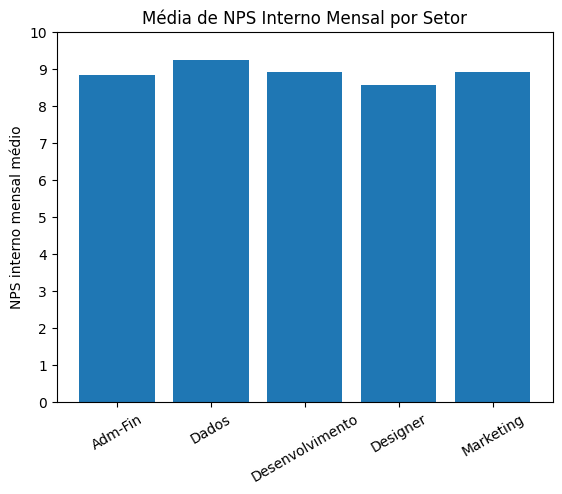

In [7]:
setores = df.groupby(["Setor"]).mean()["NPS interno"].index
nps_medio_por_setor = df.groupby(["Setor"]).mean()["NPS interno"].values

plt.bar(setores, nps_medio_por_setor)
plt.ylabel("NPS interno mensal médio")
plt.xticks(rotation = 30)
plt.yticks(np.array(range(0, 11, 1)))
plt.title("Média de NPS Interno Mensal por Setor");

/tmp/ipykernel_8303/50216537.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tipo_contratacao = df.groupby(["Tipo de Contratação"]).mean()["NPS interno"].index
/tmp/ipykernel_8303/50216537.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nps_medio_por_tipo_contratacao = df.groupby(["Tipo de Contratação"]).mean()["NPS interno"].values


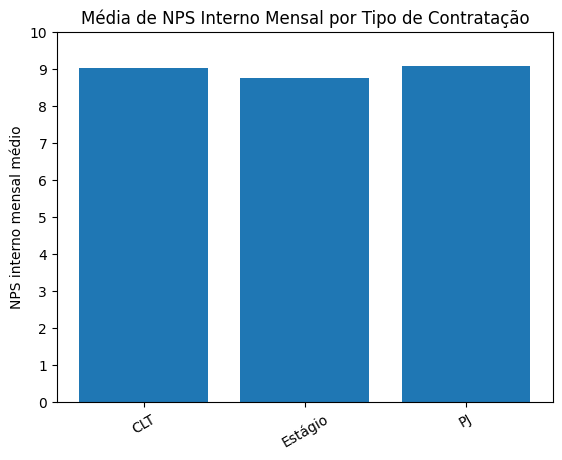

In [8]:
tipo_contratacao = df.groupby(["Tipo de Contratação"]).mean()["NPS interno"].index
nps_medio_por_tipo_contratacao = df.groupby(["Tipo de Contratação"]).mean()["NPS interno"].values

plt.bar(tipo_contratacao, nps_medio_por_tipo_contratacao)
plt.ylabel("NPS interno mensal médio")
plt.xticks(rotation = 30)
plt.yticks(np.array(range(0, 11, 1)))
plt.title("Média de NPS Interno Mensal por Tipo de Contratação");

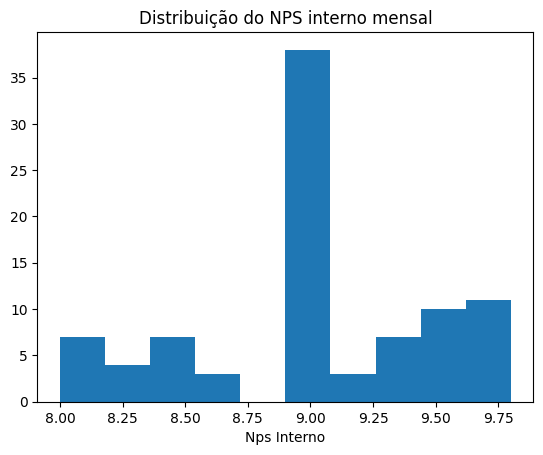

In [9]:
plt.hist(df["NPS interno"])
plt.title("Distribuição do NPS interno mensal")
plt.xlabel("Nps Interno");
